book : https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html

# Root finding

# Newton's method

$$ x_{n+1} = x_n - \frac{F(x_n)}{F'(x_n)}$$

In [1]:
# Solve x-cos(x)=0 using Newton-Raphson method, F(x) = 0
from math import *

tol=1e-10   # tolerance
x=1        # initial guess

def F(x): 
  return x-cos(x)

def Fp(x):  # Derivative of F(x)
  return 1+sin(x)

Dx=tol*10 # error, set a large initial value
n = 1
while Dx > tol:
    xlast = x;           # xlast represents x_{n+1}
    x = x - F(x)/Fp(x)   # x represents x_{n}
    Dx = fabs( x-xlast ) # estimated error
    print (n, x) 
    n = n+1

1 0.7503638678402439
2 0.7391128909113617
3 0.739085133385284
4 0.7390851332151607
5 0.7390851332151607


# bisection method

To solve $f(x) = 0$, find the root in $[a_1, b_1]$

algorithm:  
 
repeat n times.   
```
    c = (a+b)/2. 
    if f(a)*f(c) < 0
        b = c
    else
        a=c
```

In [2]:
from math import *
a=0; b=100 # initial range
tol = 1e-10
def F(x):
    return 300-75*x**2

while b-a > tol:
    c = (a+b)/2
    if F(a)*F(c) < 0:
        b = c
    else:
        a = c
print(a)

1.9999999999527063


/var/folders/ht/3426pmkd7p3chqxnqsv867h80000gn/T/ipykernel_96563/2896591357.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


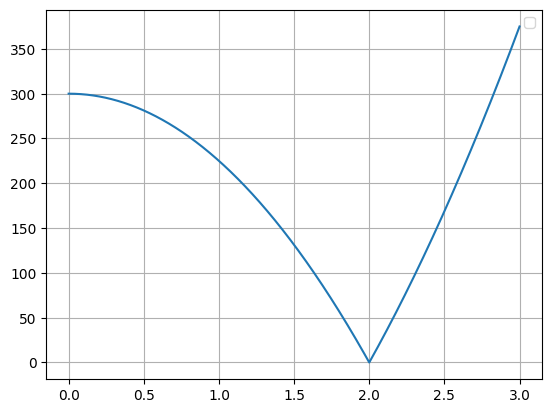

In [5]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

x = np.linspace(0, 3, 10000)
y = abs(300-75*x**2)
plt.plot(x, y)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from math import*
t = 3
theta = 0.7+2*t**2 + 0.05*t**3
d_theta = 4*t + 0.15*t**2
r = 0.25 + 0.75*t**2
dr = 1.5*t
ddr = 1.5

a1 = (ddr - r*theta**2)
a2 = (r*d_theta + 2*dr*theta)
print(a1,a2)

-2812.5175000000004 273.90000000000003


In [15]:
d_theta

13.35

# Lagrange interpolation

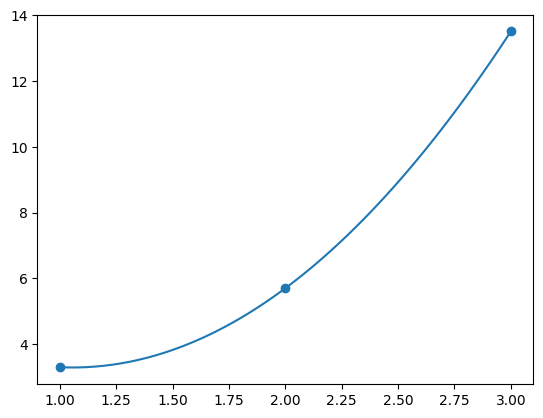

In [107]:
# Lagrange interpolation of m+1 data points
import numpy as np
import matplotlib.pyplot as plt

m=2   #  number of data points - 1 
X = np.array( [1, 2, 3] )  # x co-ord's 
Y = np.array( [3.3, 5.7, 13.5] )  # y co-ord's 
m 

def p(x):  # Lagrange interpolation function
    px = 0; 
    for j in range(m+1):
        # calculate Lagrange polymomial L_mj(x) 
        Lmj=1   
        for k in range(m+1):
            if k!=j: 
                # multiply k-th factor to Lmj
                Lmj *= (x-X[k])/(X[j]-X[k])
        px += Y[j] * Lmj; # add j-th term to px
    return px

# plot data points and interpolation function
plt.scatter(X, Y)
Xinterp = np.linspace(min(X), max(X), 100)
plt.plot(Xinterp, p(Xinterp))

In [108]:
p(4)

26.7

# linear regression

least square method
$$ m = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}$$. 
$$ c = \bar y - m\bar x $$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([0,1.0,2,3.0,4,5])
Y = np.array([0,1.1,2,2.9,4,5.01])

In [8]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num/den
c = Y_mean - (m * X_mean)

print(m, c)

0.99 0.026666666666666394


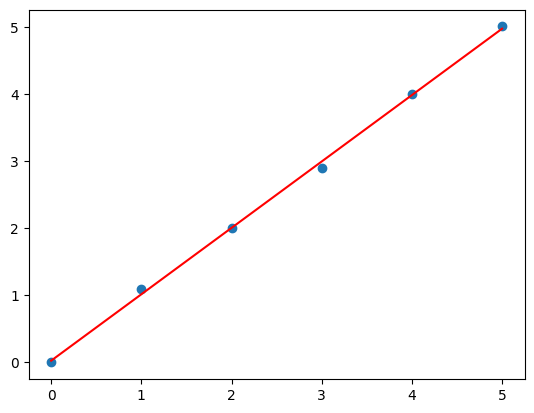

In [11]:
Y_pred = m*X + c

plt.scatter(X, Y)
#plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

Gradient descent

In [18]:
def h(b0,b1,x):  # float b0, b1, float x[]
    h_uni = [b0+b1*xi for xi in x]
    return h_uni
def standard(x):
    # Standardize a list x
    mu = np.mean(x)
    std = np.std(x)
    x_std = [(xi-mu)/std for xi in x]  # z-score
    return x_std, mu, std
def cost_function(h,y):
    # Computes square average error
    m = len(y)
    err = (1.0/(2.0*m))*sum([(h[i]-y[i])**2 for i in range(m)])
    return err
    
def update_t0(t0,alpha,h,y):
    # Update t0 coefficient during GD
    m = len(y)
    grad_t0 = (1.0/m)*sum([h[i]-y[i] for i in range(m)])
    new_t0 = t0-alpha*grad_t0
    return new_t0

def update_t1(t1,alpha,h,x,y):
    # Update t1 coefficient during GD
    m = len(y)
    grad_t1 = (1.0/m)*sum([x[i]*(h[i]-y[i]) for i in range(m)])
    new_t1 = t1-alpha*grad_t1
    return new_t1

def gd(x,y):
    t0 , t1 = 0,0 # initial guess
    alpha = 0.5
    tol = 1e-8
    diff = tol*10
    while diff > tol:
        h_0 = h(t0,t1,x)
        err_0 = cost_function(h_0,y)
        t0 = update_t0(t0,alpha,h_0,y)
        t1 = update_t1(t1,alpha,h_0,x,y)
        h_1 = h(t0,t1,x)
        err = cost_function(h_1,y)
        diff = abs(err - err_0)
    return t0, t1 , err
def plot_data(x,y,t0,t1):
    # Plot y = x data and a the line t0+t1*x
    plt.plot(x,y,marker='.',lw=0,label="data")
    x_fit = np.linspace(min(x),max(x),100)
    y_fit = [t0+t1*xi for xi in x_fit]
    plt.plot(x_fit,y_fit,lw=1,label="linear fit",color='r')
    plt.legend()
    plt.show()
def recover_beta(t0,t1,x,y,stdx,stdy):
    # Recover beta linear regression coefficients from scaled ones
    m = len(x)
    b1 = t1*stdy/stdx
    b0 = np.mean([y[i]-b1*x[i] for i in range(m)])
    return b0,b1
def r2(y,h):
    m = len(y)
    mu = np.mean(y)
    ss_res=0.0
    ss_tot=0.0
   
    for i in range(m):
        ss_res+=(y[i]-h[i])**2
        ss_tot+=(y[i]-mu)**2
 
    return 1-ss_res/ss_tot

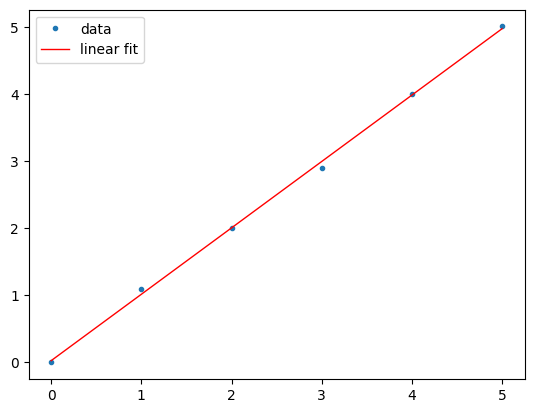

R2 score :0.9989
0.026817728678385094 0.9899395751953126


In [19]:
x_std_1, mu_1, std_x1 = standard(X)
y_std, mu_y, std_y = standard(Y)
t0 , t1 , err = gd(x_std_1,y_std)
b0, b1 = recover_beta(t0,t1,X,Y,std_x1,std_y)
plot_data(X , Y , b0 , b1)
h_uni_1 = h(b0,b1,X)
print("R2 score :{:.4f}".format(r2(Y,h_uni_1)))
print(b0,b1)

# Gaussian elimination

In [7]:
import numpy as np
n=3
A = np.array( [[ -3., 2.,-6. ],
                [ 5., 7.,-5. ],
                [ 1., 4.,-2. ] ] )
b = np.array( [ 6.,6.,8. ] )
x = np.array( [0]*3 ) # answer: -2, 3, 1
# Construction of upper triangular system
for k in range(n-1): # substep A-k
    for i in range(k+1, n): # i-th equation
        for j in range(k+1, n): # j-th term
            A[i][j] = A[i][j] - (A[i][k]/A[k][k])*A[k][j] # Aij -> Aij'

        b[i] = b[i] - (A[i][k]/A[k][k])*b[k] # Bi -> Bi'

x[n-1]= b[n-1]/A[n-1][n-1] # solution of last equation of upper triangle
# back-substitution
for k in range(n-1): # substep B-k
        i=n-k-2 # i-th equation
        for j in range(i+1, n): # j-th term
            b[i] -= A[i][j] * x[j] # subtract j-th term in i-th equation
        x[i] = b[i] / A[i][i]
# output results
print(x)

[-2  3  1]


# LU decomposition

$$ A = LU $$
where L is a lower triangular matrix and U is an upper triangular matrix

In [12]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# Define A and b
A = np.array([[-3,  2, -1],
              [ 6, -6,  7],
              [ 3, -4,  4]], dtype=float)

b = np.array([-1, -7, -6], dtype=float)

# LU decomposition and solve
lu, piv = lu_factor(A)
x = lu_solve((lu, piv), b)

print("Solution x:", x)

# Optional: verify
residual = A @ x - b
print("Residual:", residual)

Solution x: [ 2.  2. -1.]
Residual: [0. 0. 0.]


In [13]:
import numpy as np

def lu_decompose(A):
    A = A.copy().astype(float)
    n = A.shape[0]
    piv = np.arange(n)

    for k in range(n-1):
        # Partial pivoting
        pivot = np.argmax(np.abs(A[k:, k])) + k
        if A[pivot, k] == 0:
            raise np.linalg.LinAlgError("Matrix is singular.")
        if pivot != k:
            A[[k, pivot], :] = A[[pivot, k], :]
            piv[[k, pivot]] = piv[[pivot, k]]
        # Elimination
        for i in range(k+1, n):
            A[i, k] /= A[k, k]
            A[i, k+1:] -= A[i, k] * A[k, k+1:]
    return A, piv

def lu_solve_from_decomp(LU, piv, b):
    n = LU.shape[0]
    # Apply row pivots to b
    b = b.copy().astype(float)
    b = b[piv]

    # Forward substitution to solve Ly = Pb
    y = b.copy()
    for i in range(n):
        y[i+1:] -= LU[i+1:, i] * y[i]

    # Back substitution to solve Ux = y
    x = y.copy()
    for i in range(n-1, -1, -1):
        x[i] -= np.dot(LU[i, i+1:], x[i+1:])
        x[i] /= LU[i, i]
    return x

A = np.array([[-3,  2, -1],
              [ 6, -6,  7],
              [ 3, -4,  4]], dtype=float)
b = np.array([-1, -7, -6], dtype=float)

LU, piv = lu_decompose(A)
x = lu_solve_from_decomp(LU, piv, b)

print("Solution x:", x)
print("Residual:", A @ x - b)

Solution x: [ 2.  2. -1.]
Residual: [0. 0. 0.]


# Differentiation

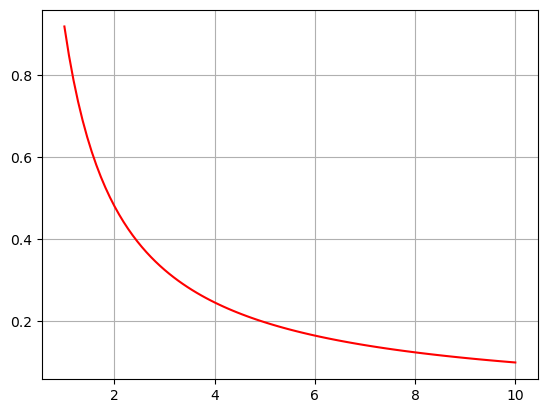

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
a = 1
b = 10
N = 100
x = np.linspace(a,b,N)
h = (b-a)/N
def f(x):
    return log(x)
y = []
for i in range(1,N+1):
    x_1 = a + (i-1)*h # xi-1
    x1 = a + (i+1)*h # xi+1
    y_i = (f(x1)-f(x_1))/(2*h)
    y.append(y_i)

plt.plot(x, y, 'r')
plt.grid(True)
plt.show()

# Integration

In [6]:
from math import *
import numpy as np
a = 0
b = 3
N = 1000000
X = np.linspace(a,b,N)
h = (b-a)/N
def f(x):
    return abs(300-75*x**2)
sum_int = 0
for i in X:
    sum_int += f(i)*h
print(sum_int)

575.0004374999062


In [12]:
from math import *
import numpy as np
a = -1000
b = 1000
N = 100000
X = np.linspace(a,b,N)
h = (b-a)/N
def f(x):
    return e**(-x**2)
sum_int = 0

for i in range(0,N):
    sum_int += h*(f(a+i*h)+f(a+(i+1)*h))/2

print(sum_int)

1.772453850905516


In [9]:
from math import *
import numpy as np
a = 0
b = 3
N = 1000000
X = np.linspace(a,b,N)
h = (b-a)/N
def f(x):
    return 300-75*x**2
sum_int = 0

for i in range(0,N-1):
    sum_int += h*(f(a+i*h)+f(a+(i+1)*h)+f(a+(i+2)*h))/3

print(sum_int)

225.0001124982841


In [60]:
from math import *
import numpy as np
a = 0
b = 1000
N = 100000
X = np.linspace(a,b,N)
h = (b-a)/N
sum_int = 0

def f(t):
    return exp(-t**2)

for i in range(0,N-1):
    sum_int += h*(f(a+i*h)+f(a+(i+1)*h)+f(a+(i+2)*h))/3

print(sum_int)

0.8812272587694243


# Euler method for 1st-oder ODE

Taylor's expansion:   
$$ x(t_0+\Delta t) = x(t_0)+\Delta t f(t_0, x(t_0))$$

$$ x_{i+1} = x_i + \Delta t f(t_i, x_i)$$

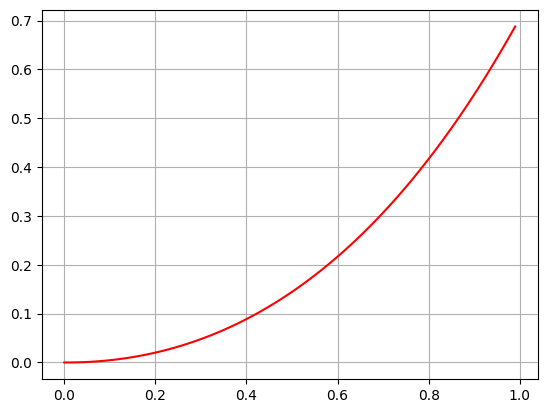

In [7]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0
dt = 0.01
x = 0.0  # Independent variable x(0) = 0
y = 0.0  # Initial condition y(0) = 0

# Differential equation: y' = y + x
def f(x, y):
    return y + x

# Arrays to store x and y values
x_values = np.arange(0, T, dt)
y_values = [y]

# Euler's method
for x in x_values[:-1]:
    y = y + dt * f(x, y)
    y_values.append(y)
    
plt.plot(x_values, y_values, 'r') # analytical solution: y = e^x - x - 1
plt.grid(True)
plt.show()

# Euler Method (forward) for 2nd-order ODE

$$ v(t) = x'(t)$$
$$ v'(t) = f(t,x(t),v(t))$$
$$ t_i = t_0 + i\Delta t$$
$$ x_{i+1} = x_i + \Delta t v_i $$
$$ v_{i+1} = v_i + \Delta t f(t_i,x_i,v_i)$$

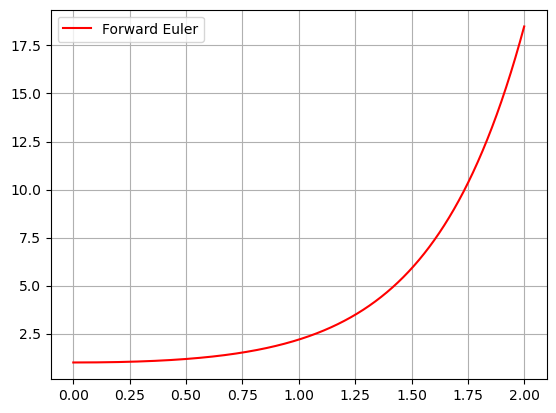

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
T = 2
dx = 0.001
y_0 = 1 # y(0) = 1
y_1 = 0 # y'(0) = 0

x_values = np.arange(0, T, dx)
y_values = [y_0]

def f(x,y_0, y_1):
    return y_0 + 2*y_1 
    
for x in x_values[:-1]:
    #print(x, y_0)
    y_values.append(y_0)
    dy_0 = dx * y_1 # Euler method iteration
    dy_1 = dx * f(x, y_0, y_1)
    y_0 += dy_0
    y_1 += dy_1

plt.plot(x_values, y_values, 'r',label='Forward Euler') 
plt.legend()
plt.grid(True)
plt.show()

# Backward Euler for 2nd-order ODEs

$$ y''+6y'+5y = 10 , y(0) = 0, y'(0) = 5 $$
$$ y_1 = y , y_1(0) = 0$$
$$ y_2 = y' , y_2(0) = 5 $$
$$ y_2 = y_1'$$
$$ y_2 = 10 - 6y_2 - 5y_1$$
backward Euler method :
$$ y_{1,i+1} = y_{1,i} + y_{2,i+1}\Delta x $$
$$ y_{2,i+1} = y_{2,i} +(10-6y_{2,i+1} -5y_{1,i+1})\Delta x $$
then
$$ y_{1,i+1} - y_{2,i+1} \Delta x = y_{1,i}$$
$$ 5y_{1,i+1}\Delta x + (1+6\Delta x)y_{2,i+1} = y_{2,i}+10\Delta x$$



$$\begin{bmatrix}1 & -\Delta x \\ 5\Delta x & 1+6\Delta x \end{bmatrix} 
\begin{bmatrix} y_{1,i+1} \\ y_{2,i+1} \end{bmatrix} = 
\begin{bmatrix} y_{1,i} \\ y_{2,i} + 10 \Delta x \end{bmatrix} $$

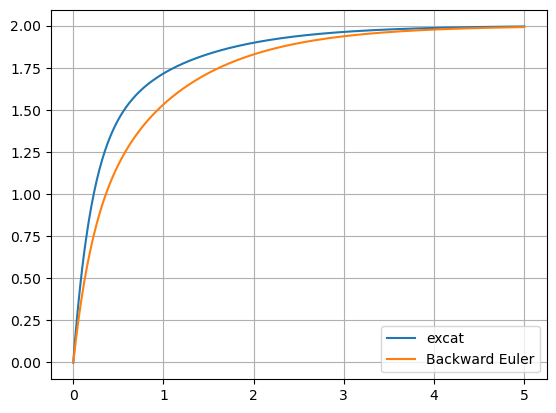

In [24]:
import numpy as np
import matplotlib.pyplot as plt
dx = 0.01
t = np.arange(0, 5.001, dx)

# Backward Euler
y_vals = np.zeros((len(t), 2))
y_vals[0,0] = 0.  # y(0) = 0
y_vals[0,1] = 5.  # y'(0) = 5

for idx, x in enumerate(t[:-1]):
    A = np.array([[1,  -dx],
                  [5*dx, 1+6*dx]])
    b = np.array([y_vals[idx,0], y_vals[idx,1]+10*dx])
    y_vals[idx+1,:] = np.linalg.solve(A, b)
    
y_exact = 2 -3/4*np.exp(-t) - 5/4*np.exp(-5*t)
plt.plot(t, y_exact, label='excat')
plt.plot(t, y_vals[:,0], label='Backward Euler')
plt.legend()
plt.grid(True)
plt.show()

# For higher order ode

$$ x'''(t) = f(t,x,x',x'')$$
$$u = x'$$
$$ v = u' = x''$$
$$ v' = f(t,x,u,v)$$

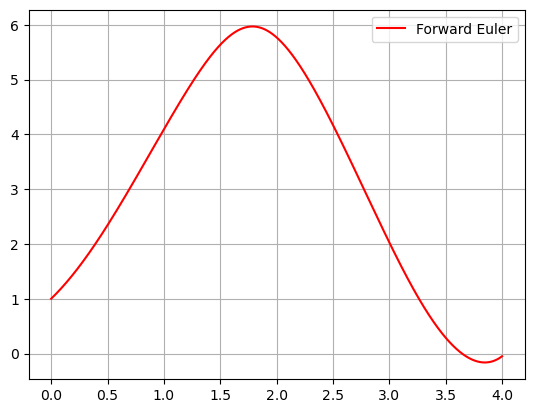

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
T = 4
dt = 0.00001
x = 1 # y(0)
u = 2 # y'(0) 
v = 3 # y''(0) 

x_values = np.arange(0, T, dt)
y_values = [x]

def f(t,x,u,v):
    return t**2 - x/(1+exp(-t)) - sin(t)*sqrt(1+v**2)*u
    
for t in x_values[:-1]:
    y_values.append(x)
    dx = dt * u # Euler method iteration
    du = dt * v
    dv = dt*f(t,x,u,v)
    x += dx
    u += du
    v += dv

plt.plot(x_values, y_values, 'r',label='Forward Euler') 
plt.legend()
plt.grid(True)
plt.show()

# Finding eigenvalue and eigenvector

find eigenvalues and eigenvectors in python: 
\begin{pmatrix}
1 & 4 \\
3 & 2
\end{pmatrix}


In [2]:
import numpy as np

# create numpy 2d-array
m = np.array([[1, 4],
              [3, 2]])

# finding eigenvalues and eigenvectors
w, v = np.linalg.eig(m)

# printing eigen values
print("Eigen values:\n",w)

# printing eigen vectors
print("eigenvectors:\n", v)

Eigen values:
 [-2.  5.]
eigenvectors:
 [[-0.8        -0.70710678]
 [ 0.6        -0.70710678]]


# runge kutta method

$$ x_{i+1} = x_i + \frac{\Delta t}{6}(f_0 + 2f_1 + 2f_2 + f_3) $$
$$ f_0 = f(t_i, x_i) $$
$$ f_1 = f(t_i + \frac{\Delta t}{2}, x_i + \frac{\Delta t}{2}f_0)$$
$$ f_2 = f(t_i + \frac{\Delta t}{2}, x_i + \frac{\Delta t}{2}f_1)$$
$$ f_3 = f(t_i +\Delta t, x_i + \Delta t f_2)$$
for $ x'(t) = f(t,x(t))$

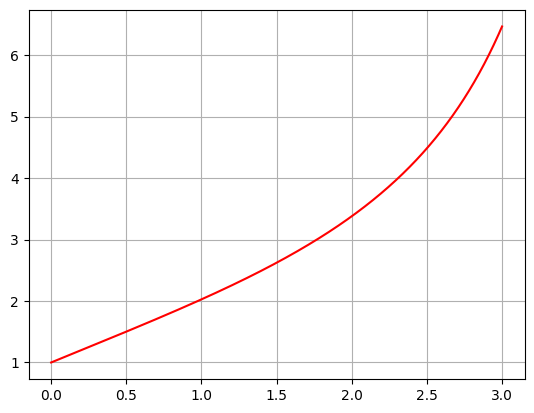

In [45]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 3.0
dt = 0.001
x = 0.0  # Independent variable x(0) = 0
y = 1.0  # Initial condition y(0) = 0

def f(x,y):
    return y/(1+sin(x))

x_values = np.arange(0, T, dt)
y_values = [y]

for x in x_values[:-1]:
    f0 = f(x,y)
    f1 = f(x + dt/2, y + dt*f0/2)
    f2 = f(x + dt/2, y + dt*f1/2)
    f3 = f(x + dt, y + dt*f2)
    y = y + dt/6*(f0 + 2*f1 + 2*f2 + f3)
    y_values.append(y)

plt.plot(x_values, y_values, 'r') # analytical solution: y = e^x - x - 1
plt.grid(True)
plt.show()

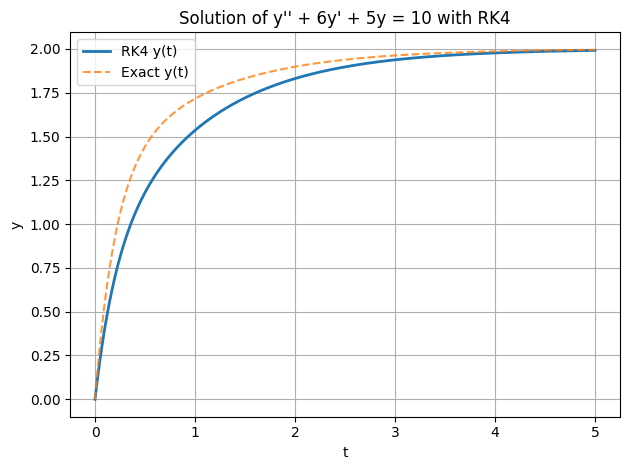

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# ODE: y'' + 6y' + 5y = 10
# x1 = y
# x2 = y'
# x1' = x2
# x2' = 10 - 6*x2 - 5*x1 //system of ode?

def f(t, x):
    x1, x2 = x
    dx1 = x2
    dx2 = 10 - 5*x1 - 6*x2
    return np.array([dx1, dx2])

def rk4_step(t, x, h, f):
    k1 = f(t, x)
    k2 = f(t + 0.5*h, x + 0.5*h*k1)
    k3 = f(t + 0.5*h, x + 0.5*h*k2)
    k4 = f(t + h, x + h*k3)
    return x + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

# Parameters
t0 = 0.0
t_end = 5.0
h = 0.0001  # step size

# Time grid
N = int((t_end - t0)/h)
t = np.linspace(t0, t_end, N+1)

# Initial conditions: y(0) = 0, y'(0) = 5
x = np.zeros((N+1, 2))
x[0, 0] = 0.0  # y
x[0, 1] = 5.0  # y'

# Integrate with RK4
for n in range(N):
    x[n+1] = rk4_step(t[n], x[n], h, f)

y = x[:, 0]
yp = x[:, 1]

y_exact = 2 -3/4*np.exp(-t) - 5/4*np.exp(-5*t)

# Plot
plt.plot(t, y, label='RK4 y(t)', linewidth=2)
plt.plot(t, y_exact, '--', label='Exact y(t)', alpha=0.8)
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solution of y'' + 6y' + 5y = 10 with RK4")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# shooting method

Try to find $y'(0)$ as the inital condition

define:  
$$ x''(t) = f(t,x(t),x'(t))$$
$$ x(t_0) = x_0$$
$$ x'(t_0) = v_0 $$
$$ g(v_0) = x(t_1) $$
since $x(t_1)$ is function of $v_0 = x'(t_0)$,
we want $y'(0)$, put $t_0 = 0$

In [19]:
import numpy as np
M = 0.1 # mass
k = 10 # spring constant
g = 9.8 # gravity
Lambda = 0.7 # damping coefficient
T = 0.1 # final time
dt= 0.001 # time step of Euler method
x0 = 0. # intial position
x1 = 2 # final position
eps=1e-12 # tolerance for machine error

def f(t, x, v):
    return -k/M*x +g - Lambda/M*v # particle acceleration
def xfinal(v0): # return x(T) as calculated by Euler method
    x=x0
    v=v0
    for t in np.arange(0, T+eps, dt):
# print(t, x) # output t, x(t)
        dx = dt * v # Euler method iteration
        dv = dt * f(t, x, v)
        x += dx
        v += dv
    return x
def F(v0): # solving F(v0)=0 (i.e. x(T)=x1) with bisection
    return xfinal(v0)-x1
    
a=0; b=100 # initial range of v0
N=50 # no. of bisection iterations
for i in range(N):
    c=(a+b)/2
    if F(a)*F(c)<0:
        b=c # take left half of the interval
    else:
        a=c # take right half of the interval
print (a, b)

32.08585839168574 32.08585839168583


$$ y'' - 2y' + y = 0, y(0) = 0 , y(2) = 5$$ find y'(0)

In [40]:
import numpy as np

T = 2 # x1
dt= 0.0001 # time step of Euler method
x0 = 0. # y(0) = 0
x1 = 5 # y(2) = 5
eps=1e-12 # tolerance for machine error

def f(t, x, v):
    return 2*v - x # v(t) = x'(t)
def xfinal(v0): # return x(T) as calculated by Euler method
    x=x0
    v=v0
    for t in np.arange(0, T+eps, dt):
        dx = dt * v # Euler method iteration
        dv = dt * f(t, x, v)
        x += dx
        v += dv
    return x
def F(v0): # solving F(v0)=0 (i.e. x(T)=x1) with bisection
    return xfinal(v0)-x1
    
a=0; b=100 # initial range of v0
N=100 # no. of bisection iterations
for i in range(N):
    c=(a+b)/2
    if F(a)*F(c)<0:
        b=c # take left half of the interval
    else:
        a=c # take right half of the interval
print (a, b)

0.3383551235922632 0.3383551235922633


$$y'' + y = t^2,y(0) = 1, y'(\pi) = -1$$
find y'(0)

In [60]:
from math import *
dt = 0.0001
x0 = 1
x1 = -1 # y'(x1)
T = pi 
eps = 1e-12

def f(t,x,v):
    return t**2 - x

def xfinal(v):
    x = x0
    for t in np.arange(0, T+eps, dt):
        dx = v*dt
        dv = f(t,x,v)*dt
        x += dx
        v += dv
    return v
    
def F(v0):
    return xfinal(v0) - x1 

a=0; b=100 # initial range of v0
N=100 # no. of bisection iterations
for i in range(N):
    c=(a+b)/2
    if F(a)*F(c)<0:
        b=c # take left half of the interval
    else:
        a=c # take right half of the interval
print (a) # y'(0)

7.28227803710216


# system of ode

$$ x_1' = x_1  $$
$$ x_2' = x_1 -x_2  $$
also can be written as 
$$\mathbf{\vec{x}'}=\begin{pmatrix}
1 & 0 \\
1 & -1
\end{pmatrix}\mathbf{\vec{x}}$$ , $$\vec{x}(0) = \begin{pmatrix}1\\2\end{pmatrix} $$
$$\mathbf{\vec{x}'} = A{\vec{x}}$$ 
first, we have to find the eigenvalues and eigenvectors of the matrix
$$ det(A-\lambda I) = 0$$
we find $ \lambda  = -1 $ and$ 1$.   
The eigenvectors are
$$ \mathbf{\vec{x_1}}=\begin{pmatrix}
2 \\
1
\end{pmatrix}$$ when eigenvalues = 1 and
$$ \mathbf{\vec{x_2}}=\begin{pmatrix}
0 \\
1
\end{pmatrix}$$ when eigenvalues = -1

In [18]:
import numpy as np

# create numpy 2d-array
m = np.array([[1, 0],
              [1, -1]])

print("Printing the Original square array:\n",m)

# finding eigenvalues and eigenvectors
w, v = np.linalg.eig(m)

# printing eigen values
print("Eigen values:\n",w)

# printing eigen vectors
print("eigenvectors:\n", v)

Printing the Original square array:
 [[ 1  0]
 [ 1 -1]]
Eigen values:
 [-1.  1.]
eigenvectors:
 [[0.         0.89442719]
 [1.         0.4472136 ]]


$$ x'(t) = -3x(t) + 6y(t) + 5z(t) $$
$$ y'(t) = 2x(t) -12y(t) $$
$$ z'(t) = x(t) + 6y(t) - 5z(t) $$

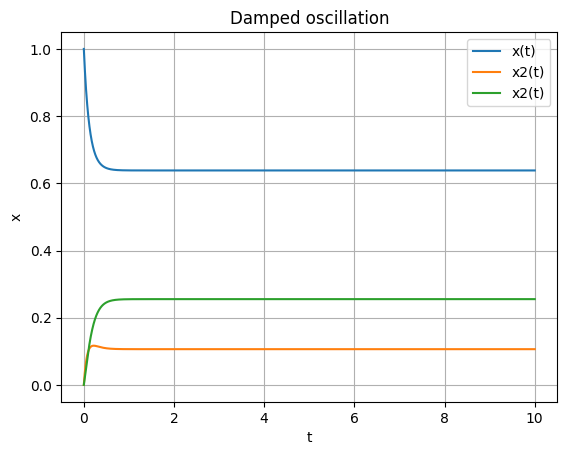

In [109]:
import numpy as np  #Damped oscillation
import matplotlib.pyplot as plt
from math import*

# Define the function f(t, y)

def f(t, y):
    return np.array([-3*y[0] + 6*y[1] + 5*y[2],
                     2*y[0] - 12*y[1],
                     y[0] + 6*y[1] -5*y[2]
                    ])     # x1' = x2 , x2' = f(t,x1)

# RK4 solver
def rk4(f, t0, y0, t1, h):
    N = int((t1 - t0) / h)
    t = np.linspace(t0, t1, N)
    y = np.zeros((N, len(y0)))
    y[0] = y0
    for i in range(N - 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h / 2, y[i] + (h / 2) * k1)
        k3 = f(t[i] + h / 2, y[i] + (h / 2) * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, y

# Initial conditions
t0 = 0
y0 = np.array([1.0, 0.0, 0.0]) # x(0) = 1, y(0) = 0, z(0) = 0
t1 = 10.0
h = 0.001

# Solve
t, y = rk4(f, t0, y0, t1, h)
# Plot the results
plt.plot(t, y[:, 0],label = 'x(t)')
plt.plot(t, y[:, 1], label='x2(t)')
plt.plot(t, y[:, 2], label='x2(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Damped oscillation')
plt.legend()
plt.grid(True)
plt.show()

# 1D steady state heat flow equation
which is 1D Laplace's Equation
$$ \frac{d^2u(x)}{dx^2} = 0 $$
with Bondary conditions
$$ u(0) = 700, u(L) = 200 $$
we can get $u = c_1 + c_2x$ easily 

# 2D steady-state heat flow equation
which is 2D Laplace's equation:
$$ \nabla ^2 u = 0 $$
$u(x,0) = 700$,$u(0,y) = 200$ $u(x,b) = 200$, $u(a,y) = 200 $ ,find $ u(x,100) , 0 < x < a$, for $a=b=1$

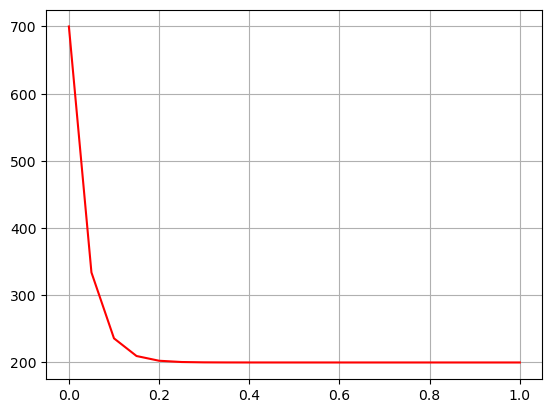

In [16]:
from math import *
import numpy as np
L=1. # length in m
N=20 # number of spatial segments
dx=L/N # spatial discretization
dy=L/N
uk = [[0]*(N+1)]*(N+1)
for i in range(1,N):
    for j in range(1,N):
        uk[i][0] = 700
        uk[0][j] = 200
        uk[i][N] = 200
        uk[N][j] = 200
        uk[i][j] = 1/4*(uk[i+1][j]+uk[i-1][j]+uk[i][j+1]+uk[i][j-1])
        
x_values = np.linspace(0, L, N+1)
plt.plot(x_values, uk[0], 'r') 
plt.grid(True)
plt.show()


# heat equation
$$ \frac{\partial u}{\partial t} = D\frac{\partial ^2 u}{\partial x^2}$$

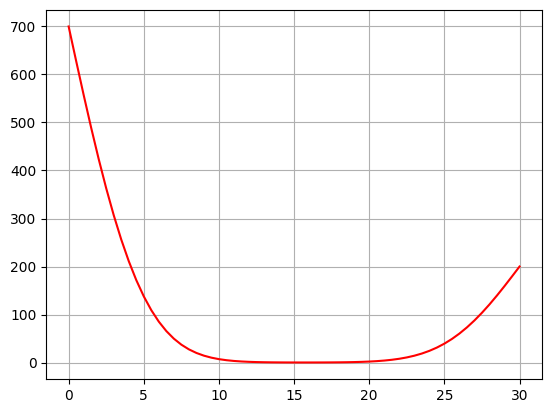

In [112]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
D=25. # diffusion coefficient
L=30. # length in mm
t = 1

dx=0.5 # spatial discretization
N = int(L/dx)
kmax=1000 # number of time steps to simulate
dt=0.001 # temporal discretization
uk = np.array([0.]*(N+1))
uk1 = np.array([0.]*(N+1))
D = 7.5
a = D * dt/(dx**2)

for k in range(1,kmax+1):
# forward Euler
    for i in range(0,N): # internal points
        uk1[i] =  a*(uk[i+1] + uk[i-1]) + (1-2*a)*uk[i] # euler method
    uk1[0] = 700
    uk1[N] = 200
    uk[:] = uk1[:]  # u(x,5)

x_values = np.linspace(0, L, N+1)
plt.plot(x_values, uk, 'r') 
plt.grid(True)
plt.show()


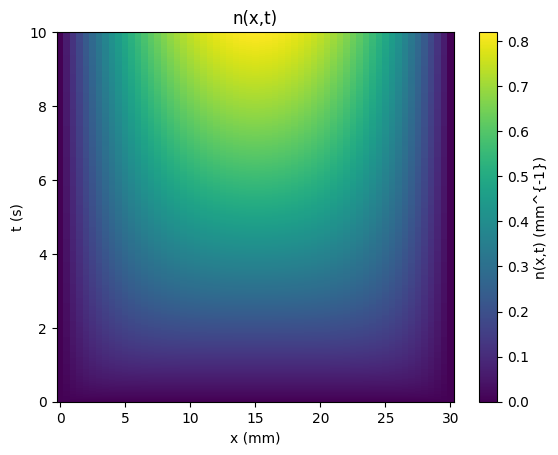

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 7.5  # mm s^-2
mu = 0.1  # mm^-1 s^-1
L = 30  # mm
dx = 0.5  # mm
dt = 0.0001  # s
t_final = 10  # s

# Discretization
N = int(L / dx)  # 60
nx = N + 1  # 61 points
nt = int(t_final / dt)  # 1000 time steps

# Initialize density
n = np.zeros(nx)
history = np.zeros((nt + 1, nx))
history[0] = n.copy()

# Time evolution
for k in range(nt):
    n_new = np.zeros(nx)
    for i in range(1, nx - 1):
        n_new[i] = n[i] + dt * D * (n[i-1] - 2 * n[i] + n[i+1]) / dx**2 + dt * mu
    n = n_new  # Boundaries remain 0
    history[k + 1] = n.copy()

# Heatmap plot
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt + 1)
X, T = np.meshgrid(x, t)
plt.pcolormesh(X, T, history, shading='auto')
plt.colorbar(label='n(x,t) (mm^{-1})')
plt.xlabel('x (mm)')
plt.ylabel('t (s)')
plt.title('n(x,t)')
plt.show()

# wave equation
$$ \frac{\partial ^2 y}{\partial t^2} = v^2 \frac{\partial ^2 y}{\partial x^2}$$

In [18]:
from math import *
import numpy as np
v=25. # velocity of wave in m/s
L=1. # length in m
A=0.02 # initial ampiltude in m
N=20 # number of spatial segments
dx=L/N # spatial discretization
kmax=80 # number of time steps to simulate
dt=0.001 # temporal discretization
yk_1 = np.array([0.]*(N+1))
yk = np.array([0.]*(N+1))
yk1 = np.array([0.]*(N+1))
#yk_1[N+1], yk[N+1], yk1[N+1] # yi at time step k-1, k and k+1
for i in range(N+1): # all points
    x = i*dx
    yk_1[i] = A*sin(pi*x/L) # initial displacment and boundary conditions
    yk[i] = yk_1[i] # becasue initial velocity = 0
a = (v*dt/dx)**2
for k in range(1,kmax+1):
    #for i in range(N+1):
        #print (i*dx, yk[i])
# forward Euler
    for i in range(1,N): # internal points
        yk1[i] = a * (yk[i+1] + yk[i-1]) + 2*(1-a)*yk[i] - yk_1[i]
    yk_1 = np.copy(yk) # copy y(k) to y(k-1)
    yk = np.copy(yk1) # copy y(k+1) to y(k)
print(yk)

[0.         0.00312925 0.00618144 0.00908143 0.0117578  0.01414466
 0.01618323 0.01782331 0.01902453 0.01975729 0.02000357 0.01975729
 0.01902453 0.01782331 0.01618323 0.01414466 0.0117578  0.00908143
 0.00618144 0.00312925 0.        ]


# fouier transform

Discrete Fourier Transform(DFT)
$$ X(k)= \sum_{n=0}^{N-1} x(n) * e^{-j * 2π * k * n / N} $$
where

$N$ = number of samples

$n$ = current sample

$k$ = current frequency, where $𝑘∈[0,𝑁−1]$

$𝑥_𝑛$= the sine value at sample n

$𝑋_𝑘$= The DFT which include information of both amplitude and phase

in simply, it try to change from time domain x(n) to frequency domain X(n)

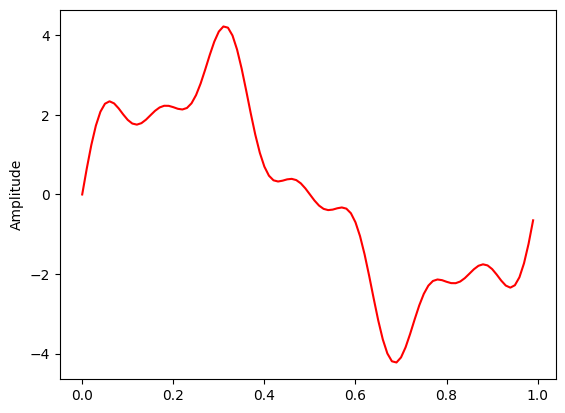

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# sample rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

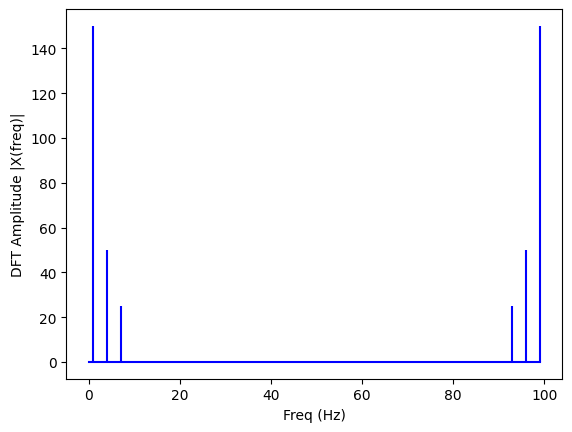

In [2]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

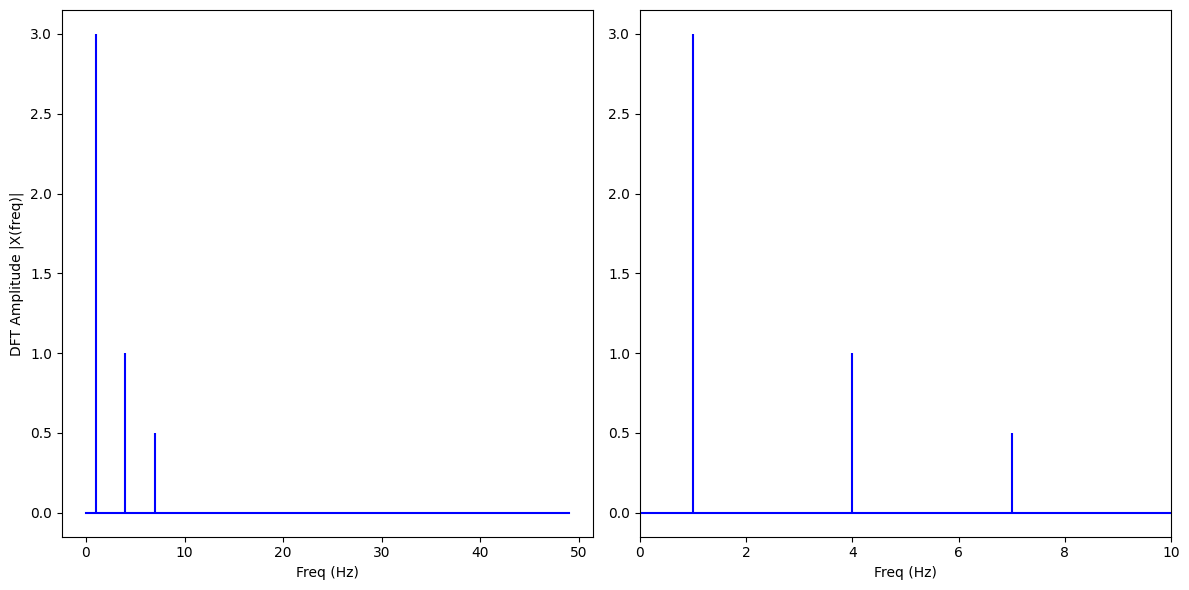

In [3]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

# Fast Fourier Transform

In [62]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

$$ X_k = \sum_{n=0}^{N-1} x_n e^{-i2\pi kn/N} $$
$$ =  \sum_{m=0}^{N/2-1}x_{2m}e^{-i2\pi k(2m)/N} +  \sum_{m=0}^{N/2-1}x_{2m+1}e^{-i2\pi k(2m+1)/N}  $$
$$ =  \sum_{m=0}^{N/2-1}x_{2m}e^{-i2\pi km/(N/2)} + e^{-i2\pi k/N}\sum_{m=0}^{N/2-1}x_{2m+1}e^{-i2\pi km/(N/2)}$$

In [63]:
def FFT(x):
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

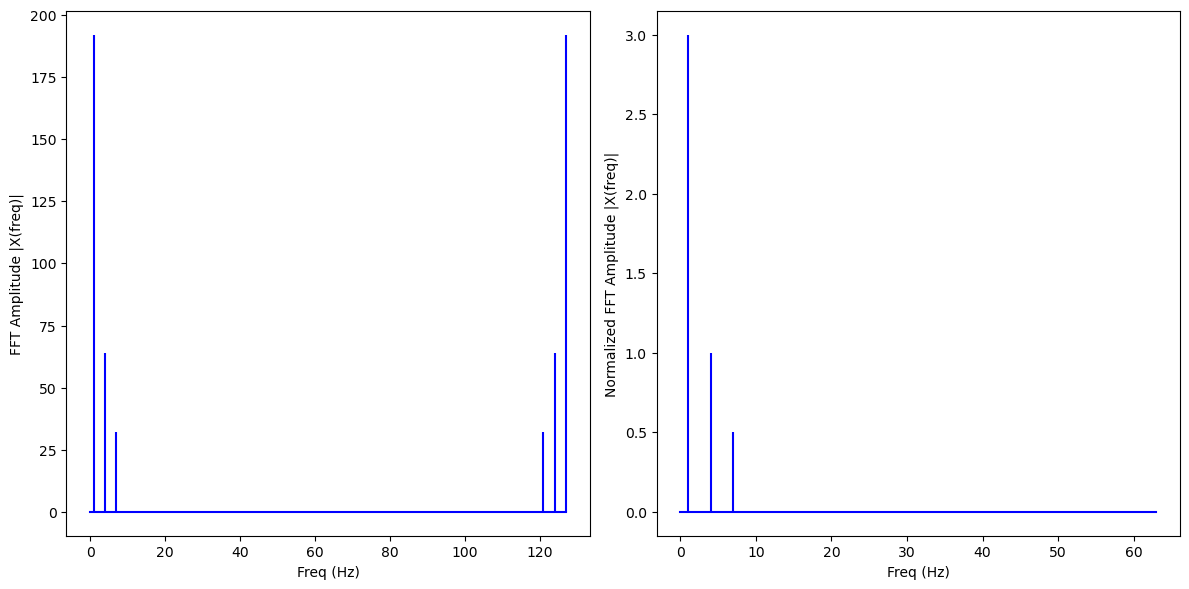

In [64]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

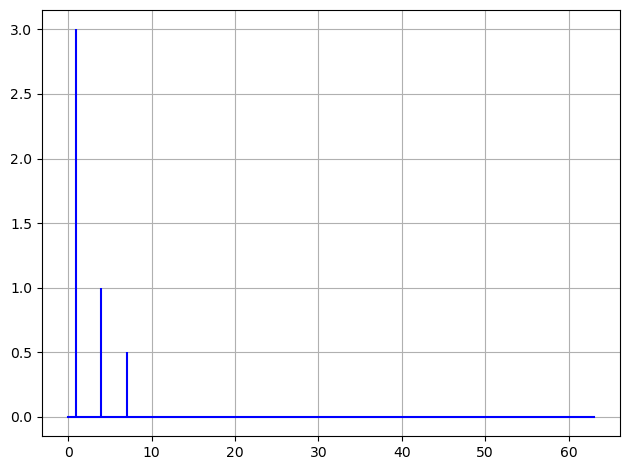

In [77]:
import matplotlib.pyplot as plt
import numpy as np

sr = 128
# sampling interval
ts = 1.0 / sr
t = np.arange(0, 1, ts)

freq = 1.
x = 3 * np.sin(2 * np.pi * freq * t)

freq = 4
x += np.sin(2 * np.pi * freq * t)

freq = 7
x += 0.5 * np.sin(2 * np.pi * freq * t)

def fft(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    return np.concatenate([even + factor * odd, even - factor * odd])

X = fft(x)
N = len(x)
frequencies = np.arange(0, N // 2) * sr / N # x
magnitudes = 2 * np.abs(X[:N // 2]) / N # y

plt.stem(frequencies, magnitudes, 'b', markerfmt=" ", basefmt="-b")
plt.tight_layout()
plt.grid(True)
plt.show()

# Application

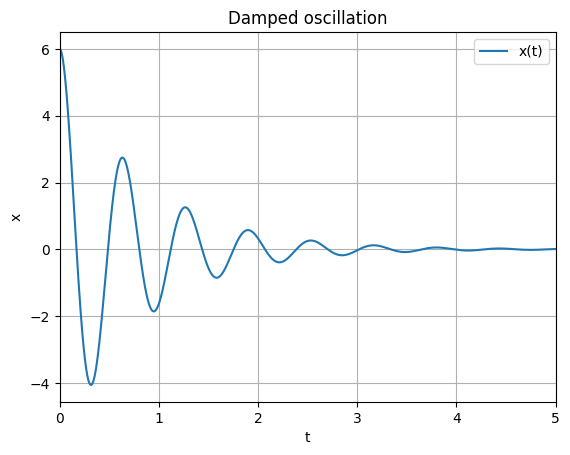

In [84]:
import numpy as np  #Damped oscillation
import matplotlib.pyplot as plt
from math import*

# Define the function f(t, y)

def f(t, y):
    return np.array([y[1],
                     -2*100*y[0]/2 - (pi/2)**2*y[1]])     # x1' = x2 , x2' = f(t,x1)

# RK4 solver
def rk4(f, t0, y0, t1, h):
    N = int((t1 - t0) / h)
    t = np.linspace(t0, t1, N)
    y = np.zeros((N, len(y0)))
    y[0] = y0
    for i in range(N - 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h / 2, y[i] + (h / 2) * k1)
        k3 = f(t[i] + h / 2, y[i] + (h / 2) * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, y

# Initial conditions
t0 = 0
y0 = np.array([6.0, -0.5])
t1 = 5.0
h = 0.001

# Solve
t, y = rk4(f, t0, y0, t_end, h)

# Plot the results
plt.plot(t, y[:, 0],label = 'x(t)')
#plt.plot(t, y[:, 1], label='x2(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(0,5)
plt.title('Damped oscillation')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
from math import*
sqrt(10000**2 + 5000**2)

11180.339887498949